# Using astroquery

## Installation

`astroquery` is affiliated to `astropy`, but not a core element of it. In case `astroquery` is not installed on your machine, you can use 

    pip install astroquery
    
to install it.

## Overview

`astroquery` is a collection of database query and service tools to load data into a Python environment. It heavily uses functionality defined in `astropy` and is fully compatible to the latter.

Note that `astroquery` is steadily under development. Functionality is added constantly and might also break at any time, as every `astroquery` submodule relies on external services to be active and stable.

`astroquery` includes submodules for many different use cases: [https://github.com/astropy/astroquery](https://github.com/astropy/astroquery)

## Examples

Please note in the following examples that there is no consistent `astroquery` API. While the API of some modules dealing with similar services is similar, other APIs might be completely different. Please have a look at the documentation and references if you are interested in using a specific service.

### Gaia queries through Vizier

[`astroquery.vizier`](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html) enables the query of the more than 11,000 catalogs provided by the [CDS Vizier service](http://vizier.u-strasbg.fr/). In this example, we will query Gaia DR2 using a cone search and sort the results by absolute proper motion.

Before performing any query with `astroquery.vizier`, we have to take a look at the corresponding Vizier catalog website: [http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/345/gaia2](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/345/gaia2) 

From this website we need the catalog identifier (`I/345/gaia2`) and a list of fields (columns) we are interested in. We will also implement a filter on the G magnitude and only query 100 sources (to keep the query short).

In [1]:
from astroquery.vizier import Vizier 
import astropy.units as u 
import astropy.coordinates as coord

vquery = Vizier(columns=['Source', 'RA_ICRS', 'DE_ICRS', 'phot_g_mean_mag', 'pmRA', 'pmDE'], 
                column_filters={"phot_g_mean_mag": "<21"}, 
                row_limit=100) 
 
field = coord.SkyCoord(ra=100*u.deg, dec=0*u.deg, frame='icrs')
gaia = vquery.query_region(field, width=("{:d}d".format(1)), catalog="I/345/gaia2")

# this is a TableList object
gaia

TableList with 1 tables:
	'0:I/345/gaia2' with 6 column(s) and 100 row(s) 

In [2]:
gaia[0]  # this is the actual data we requested

Source,RA_ICRS,DE_ICRS,Gmag,pmRA,pmDE
,deg,deg,mag,mas / yr,mas / yr
int64,float64,float64,float64,float64,float64
3119357300235686912,100.39849717193,-0.49956384560,18.5440,-6.490,1.337
3119357338894051712,100.41281415805,-0.49083679497,16.8573,0.520,0.060
3119357265875957376,100.42665579052,-0.49668103566,19.3305,-0.019,-3.088
3119357334595435904,100.40859744742,-0.49604258296,19.7285,2.102,4.444
3119357300235693824,100.40261364975,-0.49727401855,18.8356,0.460,1.207
3119357338894052352,100.41853528847,-0.49642801332,17.5472,-0.259,2.193
3119357334595452544,100.41834945103,-0.48902409494,19.1575,-1.925,0.804
3119357338892658432,100.41139028221,-0.49632364983,20.1793,-1.389,1.199


Now, we create a column `pm`, which holds the absolute proper motions, and sort the entire table based on this column. Note that although each column has a unit associated with it, we have to multiply the result with the correct unit again. This is one of the shortcoming of `astropy.table.Table` that has been fixed in `astropy.table.QTable`.

In [3]:
import numpy as np

# compute absolute proper motion
gaia[0]['pm'] = np.sqrt(gaia[0]['pmRA']**2 + gaia[0]['pmDE']**2) * u.mas/u.yr

# sort table by absolute proper motion
gaia[0].sort('pm')

gaia[0]

Source,RA_ICRS,DE_ICRS,Gmag,pmRA,pmDE,pm
,deg,deg,mag,mas / yr,mas / yr,mas / yr
int64,float64,float64,float64,float64,float64,float64
3119358094805382528,100.40233183699,-0.49265819774,20.2494,--,--,0.0
3119358094807179392,100.40929844560,-0.48653311658,20.8954,--,--,0.0
3119358060447546880,100.39271690060,-0.49251149818,20.8315,--,--,0.0
3119358094807179520,100.40937042525,-0.48086671562,20.9400,--,--,0.0
3119357957366466304,100.37917226562,-0.50000179469,20.7541,--,--,0.0
3119357888649901568,100.33239301209,-0.49130195188,20.4484,--,--,0.0
3119357819927569536,100.34027930269,-0.49642895150,19.3612,--,--,0.0
3119358129166754560,100.38390270366,-0.48458758116,20.8485,--,--,0.0


### MAST Queries

[`astroquery.mast`](https://astroquery.readthedocs.io/en/latest/mast/mast.html) enables queries on the [Barbara A. Mikulski Archive for Space Telescope](http://archive.stsci.edu/) (MAST), including catalog and image database queries, as well as object queries. 

#### Observations Queries

`astroquery.mast.observations` queries allow for querying for archived observations around a specific target or position.

The following example performs such a query around a names target. The target name is resolved on the server-side into a position.

In [4]:
from astroquery.mast import Observations

obsTable = Observations.query_object("M15",radius=".1 deg")
obsTable

intentType,obs_collection,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,proposal_id,proposal_pi,dataproduct_type,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,distance
str7,str5,str13,str12,str9,str16,str25,str56,str92,float64,float64,str5,str25,str8,int64,float64,float64,float64,float64,float64,str106,float64,str12,int64,str1270,str142,str190,str6,bool,float64,str11,str11,float64
science,SWIFT,UVOT,--,UVW1,UV;OPTICAL,"Non-GRB (322.498, 12.163)",--,00031992001,322.498403398037,12.1626805405845,--,--,cube,2,55699.1562153,55699.1677315,978.897841439691,160900000000.0,457000000000.0,--,--,--,--,POLYGON -37.650571000000014 12.049681 -37.518820000000005 12.026015 -37.374259999999992 12.00758 -37.327605000000005 12.282816 -37.448332999999991 12.303783 -37.600768000000016 12.322455 -37.650571000000014 12.049681 -37.650571000000014 12.049681,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031992001uw1[1]&size=ALL&output_size=1133,http://archive.stsci.edu/missions/swift_uvot/00031992/00031992001/sw00031992001uw1_sk.img,PUBLIC,--,5885.0,15000731855,15000288230,0.0
science,SWIFT,UVOT,--,UVW1,UV;OPTICAL,"Non-GRB (322.497, 12.166)",--,00031992002,322.496972776142,12.1656577596317,--,--,cube,2,55699.6925231,55699.7040278,978.745837283376,160900000000.0,457000000000.0,--,--,--,--,POLYGON -37.653026000000011 12.047648 -37.519279999999981 12.023982 -37.376716999999985 12.006384 -37.330918999999994 12.281622 -37.455929000000026 12.302867 -37.604081000000008 12.320422 -37.653026000000011 12.047648 -37.653026000000011 12.047648,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031992002uw1[1]&size=ALL&output_size=1130,http://archive.stsci.edu/missions/swift_uvot/00031992/00031992002/sw00031992002uw1_sk.img,PUBLIC,--,5885.0,15000731856,15000722047,0.0
science,SWIFT,UVOT,--,UVM2,UV,M15,--,00031992003,322.53942205677,12.1467062707566,--,--,cube,2,55702.3805208,55702.4246412,479.61622722387386,167900000000.0,292700000000.0,--,--,--,--,POLYGON -37.678161999999986 12.048732 -37.543551999999977 12.016453 -37.405266999999981 11.990802 -37.404303290754214 11.994938211016436 -37.342689000000007 11.983393 -37.279211999999973 12.255274 -37.391077999999993 12.281819 -37.549495999999976 12.311096 -37.550515670450466 12.306959780133395 -37.612157000000025 12.318181 -37.678161999999986 12.048732 -37.678161999999986 12.048732,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031992003um2[2]&size=ALL&output_size=1181,http://archive.stsci.edu/missions/swift_uvot/00031992/00031992003/sw00031992003um2_sk.img,PUBLIC,--,5885.0,15000790494,15000436293,0.0
science,SWIFT,UVOT,--,UVW1,UV;OPTICAL,M15,--,00031992004,322.493218756606,12.1111203651402,--,--,cube,2,55703.4987847,55703.5739352,623.865999921728,160900000000.0,457000000000.0,--,--,--,--,POLYGON -37.628225999999984 11.969998 -37.59010303069828 11.970793496732506 -37.589431999999988 11.945031 -37.46258 11.947271 -37.310350000000028 11.957804 -37.32070299999998 12.236419 -37.359043687822279 12.235545858118858 -37.360083999999972 12.261981 -37.487371999999993 12.258394 -37.635771999999974 12.24693 -37.628225999999984 11.969998 -37.628225999999984 11.969998,http://archive.stsci.edu/cgi-bin/hla/fitscut.cgi?red=sw00031992004uw1[2]&size=ALL&output_size=1046,http://archive.stsci.edu/missions/swift_uvot/00031992/00031992004/sw00031992004uw1_sk.img,PUBLIC,--,5885.0,15000731857,15000288232,0.0
science,SWIFT,UVOT,--,UVW1,UV;OPTICAL,M15,--,00031992005,322.524200623569,12.1211748543715,--,--,cube,2,55707.5153588,55707.5249884,819.34808726792,160900000000.0,457000000000.0,--,--,--,--,POLYGON -37.602655000000027 11.986191 -37.480346 11.984267 -37.323251000000027 11.990082 -37.324519000000009 12.26897 -37.444389 12.269847 -37.600504 12.263127 -37.602655000000027 11.986191 -37.602655000000027 11.986191,http://archive.stsci.edu/cgi-bin/hla/

In [5]:
dataproducts = Observations.get_product_list(obsTable[0])
dataproducts

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str11,str5,str4,str11,str132,str1,str88,str7,str28,str1,str53,str1,str1,str1,str26,int64,str11
15000731855,SWIFT,cube,00031992001,Preview-Full,S,mast:SWIFT/url/cgi-bin/hla/fitscut.cgi?red=sw00031992001uw1[1]&size=ALL&output_size=1133,PREVIEW,--,--,--,--,--,--,sw00031992001uw1_1.jpg,12164,15000731855
15000731855,SWIFT,cube,00031992001,Level 2 files describing exposure times per pixel for each observation,S,mast:SWIFT/url/missions/swift_uvot/00031992/00031992001/sw00031992001u_ex.img.gz,SCIENCE,--,--,https://archive.stsci.edu/swiftuvot/file_formats.html,--,--,--,sw00031992001u_ex.img.gz,470206,15000731855
15000731855,SWIFT,cube,00031992001,Level 2 files describing exposure times per pixel for each observation,S,mast:SWIFT/url/missions/swift_uvot/00031992/00031992001/sw00031992001uw1_ex.img.gz,SCIENCE,--,--,https://archive.stsci.edu/swiftuvot/file_formats.html,--,--,--,sw00031992001uw1_ex.img.gz,100445,15000731855
15000731855,SWIFT,cube,00031992001,Level 1 images in raw units (pixels),S,mast:SWIFT/url/missions/swift_uvot/00031992/00031992001/sw00031992001uw1_rw.img.gz,SCIENCE,--,--,https://archive.stsci.edu/swiftuvot/file_formats.html,--,--,--,sw00031992001uw1_rw.img.gz,848287,15000731855
15000731855,SWIFT,cube,00031992001,Level 2 images are named sw[obsid]u<filter>_sk.img. Here <filter> will be w1/w2/m2/u/b/v/uvw1/uvw2/uvm2. sk means sky image (Ra/Dec),S,mast:SWIFT/url/missions/swift_uvot/00031992/00031992001/sw00031992001uw1_sk.img,SCIENCE,Minimum Recommended Products,--,--,--,--,--,sw00031992001uw1_sk.img,5152300,15000731855


Any of these data products can be downloaded into your current working directory.

In [6]:
# the following code will download the selected data products
#Observations.download_products('15000731855', productType="SCIENCE")

#### Catalog queries with MAST

The following example performs a Gaia DR2 query that is similar to the one we used for vizier above:

In [7]:
from astroquery.mast import Catalogs

catalogData = Catalogs.query_region(field, radius=0.1*u.deg, catalog="Gaia", version=2)

catalogData

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
str19,str28,str19,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,int64,int64,float64,int64,int64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str13,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,float64
1635721458409799680,Gaia DR2 3119539475569633280,3119539475569633280,1209540135,2015.5,99.99820962998557,1.0150851807369816,-0.004160362234407944,1.0330155560455725,-0.773933132621446,1.1897356144186264,-0.6505085,2.581938245359542,2.040928817356255,1.4644105004155272,2.236846321851782,-0.169850662,-0.180685878,-0.40652585,0.16464828,-0.304460466,0.107157975,-0.462901562,0.319120556,0.262989223,-0.255585551,122,0,120,2,0.6540877,124.503448,0.7678914056175942,0.10342815128025092,31,False,0.0207638,1.4151500037267832,0.28653239314879864,-0.107793681,14,9,2.19536185,0,14,False,121,127.48637184776655,1.66033913199935,76.78333,20.4247055,8,43.958453113227456,11.620339982103648,3.78288865,21.243782,12,145.64102729581197,15.690285862300296,9.282242,19.35371,1.48721373,0,1.89007187,0.819076538,1.07099533,--,--,0,--,--,--,NOT_AVAILABLE,211.6300728487335,-2.5481752321652023,100.87720431834708,-23.06671051507548,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.27175455715781127
1635721458409799680,Gaia DR2 3119539479866859136,3119539479866859136,1646356482,2015.5,100.00213285582558,11.00606997788218,-0.004075779834609664,3.3233918944872713,--,--,--,--,--,--,--,-0.4200466,--,--,--,--,--,--,--,--,--,51,0,51,0,-0.7565366,38.52308,0.0,0.0,3,False,0.0220471453,--,--,-0.0121318866,6,6,148.607025,0,6,False,53,96.62806807406264,2.022916838539997,47.7667046,20.7256069,4,54.6098645197454,7.933002503796303,6.88388348,21.0082111,5,128.0620411595305,7.370249624990056,17.375536,19.4933681,1.89046419,0,1.514843,0.282604218,1.23223877,--,--,0,--,--,--,NOT_AVAILABLE,211.631789969357,-2.5446459019288863,100.88144952329746,-23.066331627842246,--,--,--,--,--,--,--,--

### NASA Exoplanet Archive

[astroquery.nasa_exoplanet_archive](https://astroquery.readthedocs.io/en/latest/nasa_exoplanet_archive/nasa_exoplanet_archive.html) enables query of a NASA-hosted exoplanet database. The interface is rather simplistic:

In [8]:
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive

exoplanet_archive_table = NasaExoplanetArchive.get_confirmed_planets_table()
exoplanet_archive_table

pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility,NAME_LOWERCASE,sky_coord
,,,,,,d,d,d,d,,AU,AU,AU,AU,,,,,,,deg,deg,deg,deg,,jupiterMass,jupiterMass,jupiterMass,jupiterMass,,,jupiterRad,jupiterRad,jupiterRad,jupiterRad,,,,,,,,,,,,deg,,deg,,,pc,pc,pc,pc,,mag,mag,mag,,,,,K,K,K,K,,solMass,solMass,solMass,solMass,,solRad,solRad,solRad,solRad,,,,,,"deg,deg"
str27,str1,str29,str29,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,str14,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,str14,str15,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,str11,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,str10,str44,str26,object
Kepler-56,c,Kepler-56 c,Transit,0,3,21.40239,0.00059,-0.00062,0.0,6,0.1652,0.0059,-0.0059,0.0,1,--,--,--,--,1,0.0,0.0,0.0,0.0,0,0.57,0.066,-0.06,0.0,4,Mass,0.874,0.041,-0.041,0.0,6,1.06,0.14,-0.13,0,2,1,1,0,19h35m02.00s,+41d52m18.7s,293.758347,2.2e-05,41.871869,1.7e-05,2,914.0,40.45,-44.76,0.0,3,12.44,0.0,0.0,Kepler-band,12.43,--,0,4840.0,97.0,-97.0,0.0,7,1.32,0.13,-0.13,0.0,5,4.23,0.15,-0.15,0.0,8,1,2014-05-14,Kepler,kepler-56c,"293.758347,41.871869"
Kepler-57,b,Kepler-57 b,Transit,0,2,5.7293196,1.8e-05,-1.8e-05,0.0,4,0.0,0.0,0.0,0.0,0,--,--,--,--,0,0.0,0.0,0.0,0.0,0,18.86,0.0,0.0,1.0,2,Mass,0.195,0.0,0.0,0.0,4,--,--,--,--,0,1,1,0,19h34m33.91s,+44d39m25.3s,293.641285,2.5e-05,44.65704,1.7e-05,2,674.0,72.97,-51.3,0.0,3,14.809,0.0,0.0,Kepler-band,14.774,--,0,5145.0,0.0,0.0,0.0,6,0.83,0.0,0.0,0.0,4,0.73,0.0,0.0,0.0,7,1,2014-05-14,Kepler,kepler-57b,"293.641285,44.65704"
Kepler-57,c,Kepler-57 c,Transit,0,2,11.6092567,8.6e-05,-8.6e-05,0.0,4,0.0,0.0,0.0,0.0,0,--,--,--,--,0,0.0,0.0,0.0,0.0,0,6.95,0.0,0.0,1.0,2,Mass,0.138,0.0,0.0,0.0,4,--,--,--,--,0,1,1,0,19h34m33.91s,+44d39m25.3s,293.641285,2.5e-05,44.65704,1.7e-05,2,674.0,72.97,-51.3,0.0,3,14.809,0.0,0.0,Kepler-band,14.774,--,0,5145.0,0.0,0.0,0.0,6,0.83,0.0,0.0,0.0,4,0.73,0.0,0.0,0.0,7,1,2014-05-14,Kepler,kepler-57c,"293.641285,44.65704"
Kepler-58,b,Kepler-58 b,Transit,0,3,10.2184954,0.00015,-0.00015,0.0,4,0.0,0.0,0.0,0.0,0,--,--,--,--,0,0.0,0.0,0.0,0.0,0,1.39,0.0,0.0,1.0,2,Mass,0.248,0.0,0.0,0.0,4,--,--,--,--,0,1,1,0,19h45m26.08s,+39d06m54.7s,296.358649,1.9e-05,39.115194,1.7e-05,2,1562.0,655.82,-252.14,0.0,3,14.82,0.0,0.0,Kepler-band,14.866,--,0,6099.0,200.0,-200.0,0.0,7,0.0,0.0,0.0,0.0,4,1.13,0.53,-0.53,0.0,8,1,2014-05-14,Kepler,kepler-58b,"296.358649,39.115194"
Kepler-58,c,Kepler-58 c,Transit,0,3,15.5741568,0.00027,-0.00027,0.0,4,0.0,0.0,0.0,0.0,0,--,--,--,--,0,0.0,0.0,0.0,0.0,0,2.19,0.0,0.0,1.0,1,Mass,0.255,0.0,0.0,0.0,3,--,--,--,--,0,1,1,0,19h45m26.08s,+39d06m54.7s,296.358649,1.9e-05,39.115194,1.7e-05,2,1562.0,655.82,-252.14,0.0,3,14.82,0.0,0.0,Kepler-band,14.866,--,0,6099.0,200.0,-200.0,0.0,7,0.0,0.0,0.0,0.0,4,1.13,0.53,-0.53,0.0,8,1,2014-05-14,Kepler,kepler-58c,"296.358649,39.115194"
Kepler-5

The following properties are available:

In [9]:
exoplanet_archive_table.colnames

['pl_hostname',
 'pl_letter',
 'pl_name',
 'pl_discmethod',
 'pl_controvflag',
 'pl_pnum',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbpern',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_orbsmaxn',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_orbeccenn',
 'pl_orbincl',
 'pl_orbinclerr1',
 'pl_orbinclerr2',
 'pl_orbincllim',
 'pl_orbincln',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassn',
 'pl_bmassprov',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_radn',
 'pl_dens',
 'pl_denserr1',
 'pl_denserr2',
 'pl_denslim',
 'pl_densn',
 'pl_ttvflag',
 'pl_kepflag',
 'pl_k2flag',
 'ra_str',
 'dec_str',
 'ra',
 'st_raerr',
 'dec',
 'st_decerr',
 'st_posn',
 'st_dist',
 'st_disterr1',
 'st_disterr2',
 'st_distlim',
 'st_distn',
 'st_optmag',
 'st_optmagerr',
 'st_optmaglim',
 'st_optband',
 'gaia_gmag',
 'gaia_gmagerr',
 'gaia_gmaglim',
 'st_teff',
 'st

We can query all exoplanets discovered by K2:

In [10]:
list(exoplanet_archive_table['pl_name'][exoplanet_archive_table['pl_facility'] == 'K2'])

['HIP 116454 b',
 'K2-3 b',
 'K2-3 c',
 'K2-3 d',
 'K2-22 b',
 'WASP-47 d',
 'WASP-47 e',
 'K2-29 b',
 'K2-26 b',
 'K2-27 b',
 'K2-24 b',
 'K2-24 c',
 'K2-28 b',
 'K2-19 d',
 'K2-31 b',
 'K2-32 b',
 'K2-32 d',
 'K2-32 c',
 'K2-34 b',
 'K2-4 b',
 'K2-5 b',
 'K2-25 b',
 'K2-5 c',
 'K2-6 b',
 'K2-7 b',
 'K2-8 b',
 'K2-9 b',
 'K2-19 b',
 'K2-19 c',
 'K2-10 b',
 'K2-11 b',
 'K2-12 b',
 'K2-13 b',
 'K2-14 b',
 'K2-15 b',
 'K2-16 b',
 'K2-16 c',
 'K2-17 b',
 'K2-18 b',
 'K2-33 b',
 'K2-35 b',
 'K2-35 c',
 'K2-36 b',
 'K2-36 c',
 'K2-37 b',
 'K2-37 c',
 'K2-37 d',
 'K2-38 b',
 'K2-38 c',
 'K2-8 c',
 'HIP 41378 b',
 'HIP 41378 e',
 'HIP 41378 f',
 'K2-42 b',
 'K2-43 b',
 'K2-44 b',
 'K2-45 b',
 'K2-46 b',
 'K2-47 b',
 'K2-48 b',
 'K2-49 b',
 'K2-50 b',
 'K2-52 b',
 'K2-53 b',
 'K2-54 b',
 'K2-55 b',
 'HIP 41378 c',
 'HIP 41378 d',
 'BD+20 594 b',
 'K2-97 b',
 'K2-98 b',
 'K2-100 b',
 'K2-101 b',
 'K2-102 b',
 'EPIC 211822797 b',
 'K2-104 b',
 'K2-57 b',
 'K2-58 b',
 'K2-58 c',
 'K2-58 d',
 'K2-

And we can query individual objects:

In [11]:
# extract a single planet
k2whatever = NasaExoplanetArchive.query_planet( 'K2-223 c')

k2whatever

pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpern,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxn,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenn,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbincln,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassn,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radn,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densn,pl_ttvflag,pl_kepflag,pl_k2flag,ra_str,dec_str,ra,st_raerr,dec,st_decerr,st_posn,st_dist,st_disterr1,st_disterr2,st_distlim,st_distn,st_optmag,st_optmagerr,st_optmaglim,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffn,st_mass,st_masserr1,st_masserr2,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility,NAME_LOWERCASE,sky_coord
,,,,,,d,d,d,d,,AU,AU,AU,AU,,,,,,,deg,deg,deg,deg,,jupiterMass,jupiterMass,jupiterMass,jupiterMass,,,jupiterRad,jupiterRad,jupiterRad,jupiterRad,,,,,,,,,,,,deg,,deg,,,pc,pc,pc,pc,,mag,mag,mag,,,,,K,K,K,K,,solMass,solMass,solMass,solMass,,solRad,solRad,solRad,solRad,,,,,,"deg,deg"
str27,str1,str29,str29,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,str14,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,str14,str15,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,str11,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,str10,str44,str26,object
K2-223,c,K2-223 c,Transit,0,2,4.56327,0.00051,-0.00049,0.0,2,0.0549,0.0003,-0.0003,0.0,1,--,--,--,0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0,--,0.14,0.01,-0.006,0.0,2,--,--,--,0,0,0,0,1,12h21m13.48s,-10d16m55.3s,185.306152,0.0,-10.282037,0.0,1,201.1,2.5,-2.5,0.0,2,11.431,0.02,0.0,V (Johnson),11.274,--,0,5835.0,38.0,-40.0,0.0,3,1.06,0.02,-0.02,0.0,2,0.99,0.01,-0.01,0.0,3,0,2018-07-12,K2,k2-223c,"185.306152,-10.282037"


### SDSS images and catalogs

[astroquery.sdss](https://astroquery.readthedocs.io/en/latest/sdss/sdss.html) provides an interface to the SDSS databases for images, photometry, and spectroscopy.

The following example obtains image and photometry data for a given field and plots the image along with all sources found by SDSS:

In [12]:
from astroquery.sdss import SDSS

field = coord.SkyCoord('10h13m38.4s -00d55m32.6s', frame='icrs')
xid = SDSS.query_region(field)
xid

ra,dec,objid,run,rerun,camcol,field
float64,float64,int64,int64,int64,int64,int64
153.409481650134,-0.925411819880563,1237648720145350665,756,301,1,251
153.409484237648,-0.925423938718254,1237654873220120586,2188,301,6,209


In [13]:
# obtain image (as HDUList object)
img = SDSS.get_images(run=756, field=251, camcol=1)

In [14]:
# obtain photometric data (as Table)
phot = SDSS.query_photoobj(run=756, field=251, camcol=1, fields=['ra', 'dec', 'psfMag_r'])
phot = phot[phot['psfMag_r'] != -9999]
phot = phot[phot['psfMag_r'] < 20]
phot

ra,dec,psfMag_r
float64,float64,float64
153.472703089594,-0.876673705277813,17.48574
153.437227479459,-0.868768600579577,18.5815
153.43472496213,-0.960633331676371,19.10736
153.365781157937,-0.937145056132418,19.71221
153.445573424181,-0.915289985297547,18.72964
153.409520906361,-0.859439991502231,17.92762
153.417109118692,-0.863707458707979,17.9507
153.351628541607,-0.902820987655131,13.07184
153.333029314224,-1.02128462442834,14.35627


In [15]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS 
from astropy.visualization import (ZScaleInterval, MinMaxInterval,
                                   LinearStretch, SqrtStretch, ImageNormalize)

imgdat = img[0][0].data
wcs = WCS(img[0][0].header)

# define image scale and stretch
norm = ImageNormalize(imgdat, interval=ZScaleInterval(), stretch=LinearStretch())

# plot image
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection=wcs)
ax.imshow(imgdat, origin='lower', cmap=plt.cm.viridis, norm=norm)

# convert ra and dec to image x and y
x, y = wcs.all_world2pix(phot['ra'], phot['dec'], 1)

# indicate sources
ax.scatter(x, y, color='none', edgecolor='white', s=20+100*(20-phot['psfMag_r']), marker='o')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


### JPL Small-Body Database Browser

[astroquery.jplsbdb](https://astroquery.readthedocs.io/en/latest/jplsbdb/jplsbdb.html) provides an interface to the query the [JPL Small-Body Database Browser](https://ssd.jpl.nasa.gov/sbdb.cgi). The following example queries a default subset of available information on asteroid 12893:

In [16]:
from astroquery.jplsbdb import SBDB

data = SBDB.query(12893)
data

OrderedDict([('object',
              OrderedDict([('shortname', '12893 Mommert'),
                           ('neo', False),
                           ('orbit_class',
                            OrderedDict([('name', 'Main-belt Asteroid'),
                                         ('code', 'MBA')])),
                           ('pha', False),
                           ('spkid', '2012893'),
                           ('kind', 'an'),
                           ('orbit_id', '19'),
                           ('fullname', '12893 Mommert (1998 QS55)'),
                           ('des', '12893'),
                           ('prefix', None)])),
             ('signature',
              OrderedDict([('source',
                            'NASA/JPL Small-Body Database (SBDB) API'),
                           ('version', '1.1')])),
             ('orbit',
              OrderedDict([('source', 'JPL'),
                           ('cov_epoch', Unit("2.45597e+06 d")),
                           ('mo

The query results are read into an OrderedDict. A human-readable presentation of the data can be obtained using `SBDB.schematic()`:

In [17]:
print(SBDB.schematic(data))

+-+ object: 
| +-- shortname: 12893 Mommert
| +-- neo: False
| +-+ orbit_class: 
| | +-- name: Main-belt Asteroid
| | +-- code: MBA
| +-- pha: False
| +-- spkid: 2012893
| +-- kind: an
| +-- orbit_id: 19
| +-- fullname: 12893 Mommert (1998 QS55)
| +-- des: 12893
| +-- prefix: None
+-+ signature: 
| +-- source: NASA/JPL Small-Body Database (SBDB) API
| +-- version: 1.1
+-+ orbit: 
| +-- source: JPL
| +-- cov_epoch: 2.45597e+06 d
| +-- moid_jup: 2.33 AU
| +-- t_jup: 3.309
| +-- condition_code: 0
| +-- not_valid_before: None
| +-- rms: 0.51
| +-- model_pars: []
| +-- orbit_id: 19
| +-- producer: Otto Matic
| +-- first_obs: 1983-10-08
| +-- soln_date: 2018-10-03 17:15:04
| +-- two_body: None
| +-- epoch: 2.4586e+06 d
| +-+ elements: 
| | +-- e: 0.0706
| | +-- e_sig: 5.3e-08
| | +-- a: 2.83 AU
| | +-- a_sig: 1.6e-08 AU
| | +-- q: 2.63 AU
| | +-- q_sig: 1.5e-07 AU
| | +-- i: 2.33 deg
| | +-- i_sig: 5.6e-06 deg
| | +-- om: 185 deg
| | +-- om_sig: 9.7e-05 deg
| | +-- w: 184 deg
| | +-- w_sig: 

Individual parts of the data set can be accessed like any dictionary:

In [18]:
data['orbit']['elements']

OrderedDict([('e', '0.0706'),
             ('e_sig', '5.3e-08'),
             ('a', Unit("2.83 AU")),
             ('a_sig', Unit("1.6e-08 AU")),
             ('q', Unit("2.63 AU")),
             ('q_sig', Unit("1.5e-07 AU")),
             ('i', Unit("2.33 deg")),
             ('i_sig', Unit("5.6e-06 deg")),
             ('om', Unit("185 deg")),
             ('om_sig', Unit("9.7e-05 deg")),
             ('w', Unit("184 deg")),
             ('w_sig', Unit("0.0001 deg")),
             ('ma', Unit("134 deg")),
             ('ma_sig', Unit("2.8e-05 deg")),
             ('tp', Unit("2.45795e+06 d")),
             ('tp_sig', Unit("0.00013 d")),
             ('per', Unit("1740 d")),
             ('per_sig', Unit("1.5e-05 d")),
             ('n', Unit("0.207 deg / d")),
             ('n_sig', Unit("1.7e-09 deg / d")),
             ('ad', Unit("3.03 AU")),
             ('ad_sig', Unit("1.7e-08 AU"))])

In [19]:
data['orbit']['elements']['a'].to('km')

423361974.081

### JPLHorizons

[astroquery.jplhorizons](https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html) provides an interface to the JPL Horizons systems, which offers orbital elements, ephemerides, and state vectors for every known Solar System object.

#### Ephemerides query

The following example obtains ephemerides for asteroid 12893 as seen from the DCT (`location='G37'`) for the following night. Only epochs are returned when the Sun has set and the target's airmass is less than 2:

In [20]:
from astroquery.jplhorizons import Horizons
from astropy.time import Time

obj = Horizons('12893', location='G37', epochs={'start': '2019-03-05', 'stop': '2019-03-06', 'step': '10m'})

In [21]:
eph = obj.ephemerides(airmass_lessthan=2, skip_daylight=True)
eph

targetname,datetime_str,datetime_jd,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat
---,---,d,mag,---,---,---,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,---,---,mag,mag,mag / arcsec2,%,arcsec,arcsec,---,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,---,deg,deg,%,deg,deg,deg,deg,---,s,deg,deg,deg,deg,deg,deg,---,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,---,deg,deg,deg
str25,str17,float64,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,int64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12893 Mommert (1998 QS55),2019-Mar-05 01:30,2458547.5625,13.9,0.15,C,,129.47997,16.04418,129.74961,15.97515,-17.5366,7.313429,95.6486,36.64,456.31,738.27,516506.9,79925.63,71.38,4.9060801926,1.672,0.255,18.55,5.96,98.998,3.4e-05,517419.7,*,0.003444,--,--,--,--,281.5,0.0,--,--,139.1801,-1.6848,2.945937632601,0.9690354,2.08748069151184,14.6492561,17.361048,16.98885,16.68631,143.7277,/T,11.4827,161.4,2.6,24.7863,101.42,283.48,0.41161,Cnc,69.185453,127.9714391,-2.376297,--,--,209.630328,30.619291,17.8778071219,0.000354,0.1,0.08,0.101,0.079,-13.358,0.05,0.128,61.5873,5.1e-06,0.14,0.5,0.000411,129.3027,-3.743893485,11.4874,133.4412,-2.0416
12893 Mommert (1998 QS55),2019-Mar-05 01:40,2458547.569444444,13.9,0.15,C,,129.47913,16.04452,129.74876,15.97549,-17.5634,7.305669,97.2563,38.6877,460.07,735.93,516483.4,79917.17,71.379,5.0732031667,1.597,0.243,18.55,5.96,98.998,3.5e-05,517391.6,*,0.003444,--,--,--,--,281.5,0.0,--,--,139.1815,-1.6847,2.945941518935,0.969017,2.08753947021461,14.6611662,17.361536,16.98883,16.70126,143.7199,/T,11.4849,161.3,2.6,24.792,101.421,283.48,0.41147,Cnc,69.185454,127.9705685,-2.3761755,--,--,209.629606,30.61867,18.044499479,0.000354,0.1,0.08,0.101,0.079,-13.358,0.05,0.128,61.5906,5.1e-06,0.14,0.5,0.000411,129.304,-3.57671433,11.4896,133.4415,-2.0416
12893 Mommert (1998 QS55),2019-Mar-05 01:50,2458547.576388889,13.9,0.15,N,,129.47828,16.04486,129.74792,15.97583,-17.5892,7.297523,98.9261,40.7279,464.89,732.89,516459.9,79908.71,71.377,5.2403261408,1.53,0.233,18.55,5.96,98.998,3.5e-05,517363.5,*,0.003444,--,--,--,--,281.5,0.0,--,--,139.1828,-1.6847,2.945945405196,0.9689987,2.08759829783006,14.6736436,17.362026,16.9888,16.71648,143.7121,/T,11.4871,161.2,2.5,24.7976,101.421,283.48,0.41133,Cnc,69.185454,127.9696968,-2.3760545,--,--,209.628884,30.618048,18.211191583,0.000354,0.1,0.08,0.101,0.079,-13.357,0.05,0.128,61.5938,5.1e-06,0.14,0.5,0.000411,129.3053,-3.409535085,11.4918,133.4417,-2.0415
12893 Mommert (1998 QS55),2019-Mar-05 02:00,2458547.583333333,13.9,0.15,N,,129.47743,16.04519,129.74707,15.97617,-17.6139,7.289003,100.668,42.7586,470.88,729.05,516436.4,79900.25,71.376,5.4074491149,1.471,0.224,18.55,5.96,98.997,3.5e-05,517335.4,*,0.

#### Orbital elements query

The following example queries the osculating orbital elements for asteroid Ceres over the next 100 years in 1 year steps:

In [22]:
obj = Horizons('Ceres', epochs={'start': '2019-03-05', 'stop': '2119-03-06', 'step': '1y'})

In [23]:
el = obj.elements()
el

targetname,datetime_jd,datetime_str,H,G,e,q,incl,Omega,w,Tp_jd,n,M,nu,a,Q,P
---,d,---,mag,---,---,AU,deg,deg,deg,d,deg / d,deg,deg,AU,AU,d
str7,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1 Ceres,2458547.5,A.D. 2019-Mar-05 00:00:00.0000,3.34,0.12,0.07589615719858286,2.558512120036736,10.59395452449465,80.30583708798557,73.4783156492489,2458238.253099298,0.2139459256600069,66.1621144281895,74.40523547428275,2.768641359915371,2.978770599794005,1682.668173695887
1 Ceres,2458913.5,A.D. 2020-Mar-05 00:00:00.0000,3.34,0.12,0.077190941537906,2.554855979183249,10.58997936740895,80.29593557208541,73.76448458590265,2458240.282580242,0.2139548877626677,144.0381574841122,148.8497417519648,2.768564044485042,2.982272109786836,1682.597690403478
1 Ceres,2459278.5,A.D. 2021-Mar-05 00:00:00.0000,3.34,0.12,0.07828348521787522,2.549305618054649,10.5880216125256,80.26930660085061,73.73665865247561,2459921.350199848,0.214272912508768,222.2546153716386,216.6398139258199,2.765823956899865,2.98234229574508,1680.100371927641
1 Ceres,2459643.5,A.D. 2022-Mar-05 00:00:00.0000,3.34,0.12,0.07852267020585173,2.548912416148357,10.58757281171737,80.26858153109809,73.62417690170794,2459920.748617893,0.2142390764090452,300.602512166968,292.4787619050309,2.766115165001148,2.983317913853938,1680.365720549758
1 Ceres,2460008.5,A.D. 2023-Mar-05 00:00:00.0000,3.34,0.12,0.07882482879740688,2.549077082793916,10.58634723084486,80.25989488975324,73.46956543941194,2459920.092108749,0.214112960653763,18.92927534084503,22.1575230045031,2.76720124736547,2.985325411937025,1681.355481241266
1 Ceres,2460374.5,A.D. 2024-Mar-05 00:00:00.0000,3.34,0.12,0.07901214272513817,2.548491952707099,10.58751566100413,80.2535128636087,73.372790388798,2459919.74476173,0.2141213784060003,97.37281845577928,106.2046091071006,2.767128722248203,2.985765491789307,1681.289382125104
1 Ceres,2460739.5,A.D. 2025-Mar-05 00:00:00.0000,3.34,0.12,0.07935746033177356,2.546647871505817,10.58786322008241,80.25350256534077,73.26425222835711,2459919.632088958,0.2142334508096702,175.6431317907191,176.2715800823452,2.766163588773072,2.985679306040327,1680.409845611981
1 Ceres,2461104.5,A.D. 2026-Mar-05 00:00:00.0000,3.34,0.12,0.07963938783553738,2.545279842923952,10.58800693897349,80.24873554624939,73.30567596296581,2461599.91842923,0.214307713672897,253.8280091202413,245.3309674828608,2.765524522978095,2.985769203032238,1679.82754250963


We plot the semi-major of Ceres as a function of time:

Text(0,0.5,'Semi-major axis (au)')

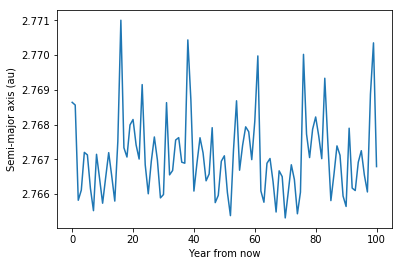

In [24]:
import matplotlib.pyplot as plt

plt.plot((el['datetime_jd']-el['datetime_jd'][0])/365.25, el['a'])
plt.xlabel('Year from now')
plt.ylabel('Semi-major axis (au)')